In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import copy
import time
import re
from keras.models import Model, model_from_json
from keras.optimizers import RMSprop
import glob
from coins_utils import *

#input information to explores
InputFolder = "CandidateDataSet2/RAW/mix/" # Here I store the input images
#InputFolder = "WhiteBackground/" # Here I store the input images
CoinsOutputFolder = "CandidateDataSet2/Processed_RAW/mix/" # Here I store the pictures of individual coins
CirclesOutputFolder = "CandidateDataSet2/Circles_RAW/mix/" # Here I store the pictures of individual coins


Using TensorFlow backend.


# Identifying the coins using the trained CNNs

Loaded model Model_Example_Coin_Classifier from disk 

Loaded model Model_Example_Coin_Classifier_BigCoins from disk 

Loaded model Model_Example_Coin_Classifier_GoldenCoins_Reduced from disk 

Loaded model Model_Example_Coin_Classifier_SmallCoins_Reduced from disk 

Analyzing input image CandidateDataSet2/RAW/mix/P70216-160609.jpg


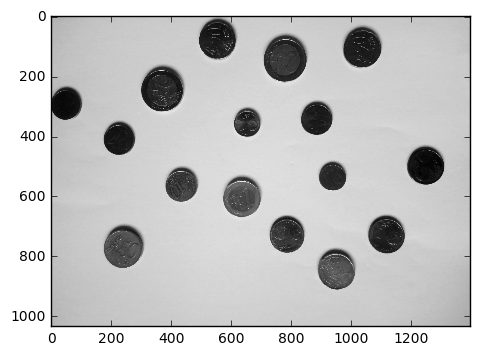

(1034, 1397, 3)


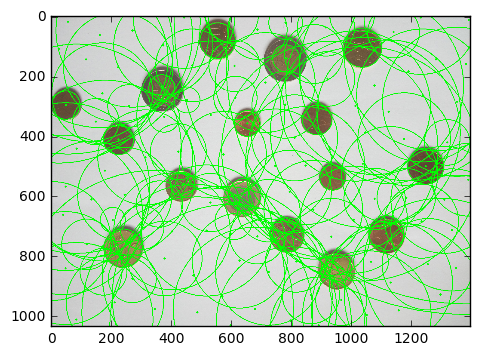

Total number of circles 16
(1034, 1397, 3)


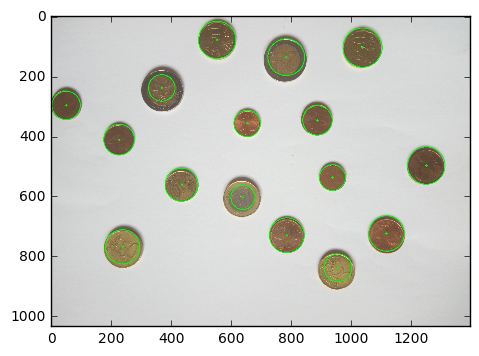

[368 242  44]
185 299 311 425


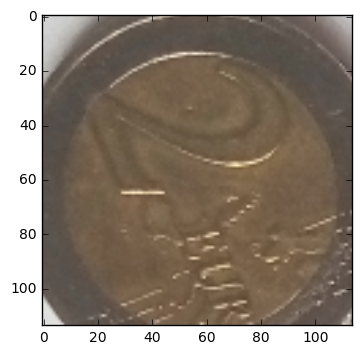

[1116  726   59]
650 802 1040 1192


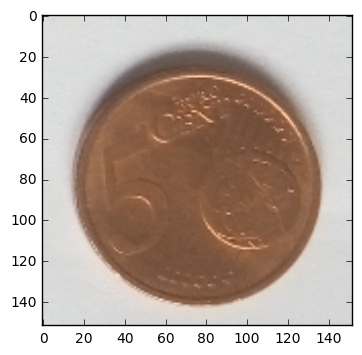

[782 140  61]
61 219 703 861


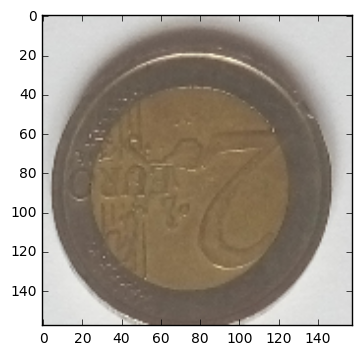

[784 732  58]
657 807 709 859


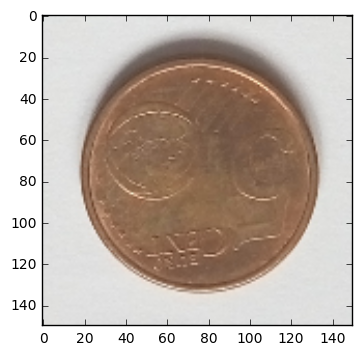

[226 414  51]
348 480 160 292


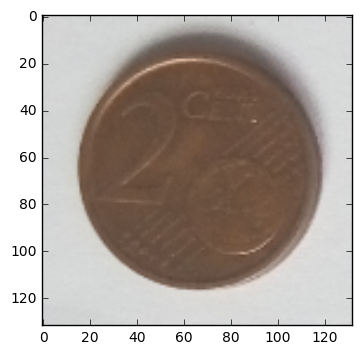

[238 770  57]
696 844 164 312


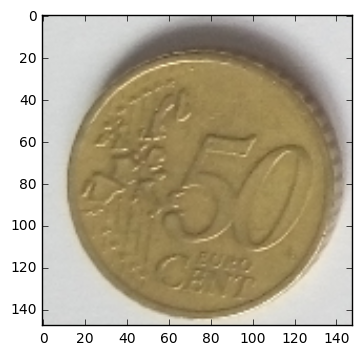

[1248  500   62]
420 580 1168 1328


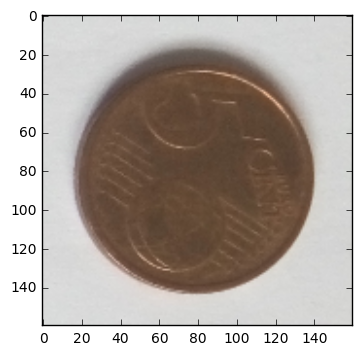

[954 840  46]
781 899 895 1013


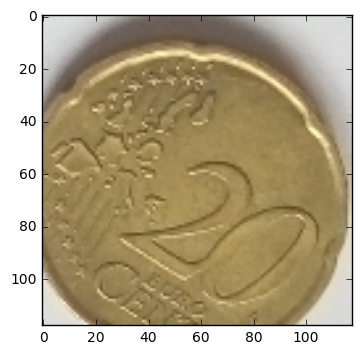

[638 606  40]
554 658 586 690


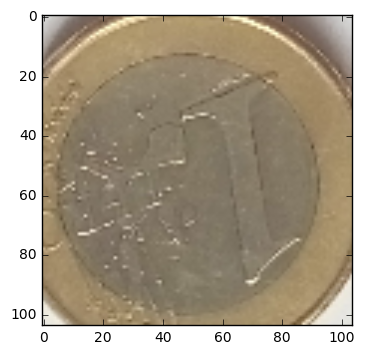

[1036  108   65]
24 192 952 1120


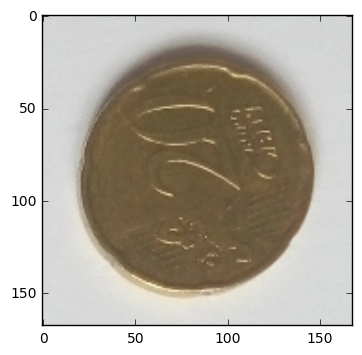

[552  82  62]
2 162 472 632


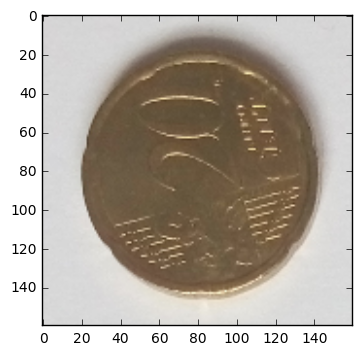

[886 350  49]
287 413 823 949


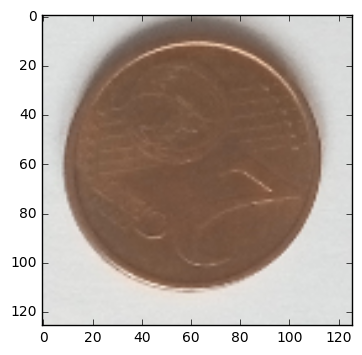

[ 50 300  47]
239 361 0 111


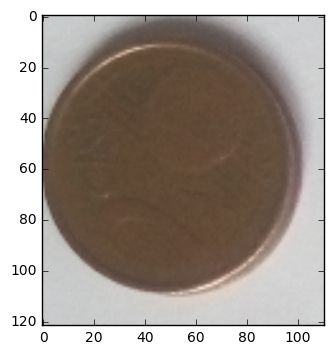

[652 360  44]
303 417 595 709


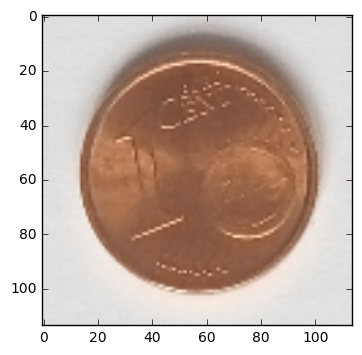

[434 564  55]
493 635 363 505


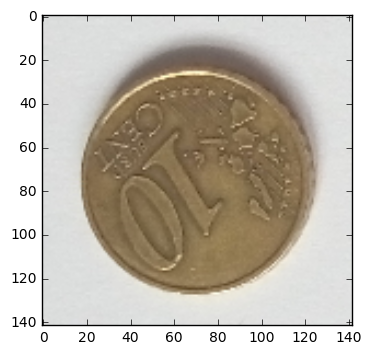

[936 540  43]
485 595 881 991


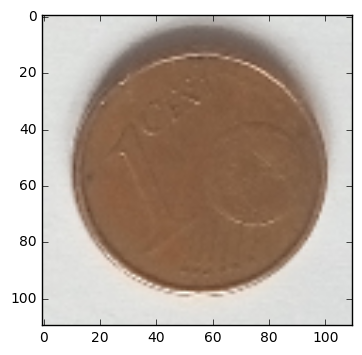

 0.00000009 of 1 euro 

 0.96748841 of 2 euro 



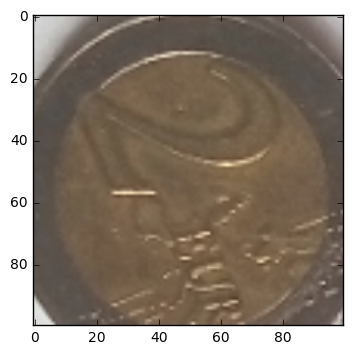

 0.00026575 of 1 cent 

 0.00044210 of 2 cent 

 0.00369405 of 5 cent 



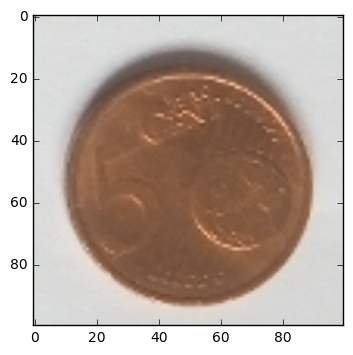

 0.00000009 of 1 euro 

 0.96852732 of 2 euro 



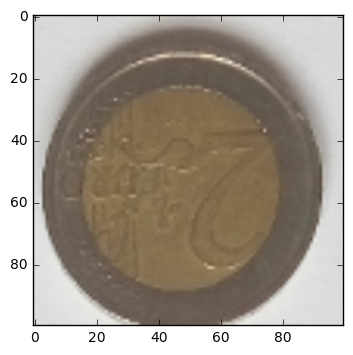

 0.01541599 of 1 cent 

 0.04071985 of 2 cent 

 0.00003683 of 5 cent 



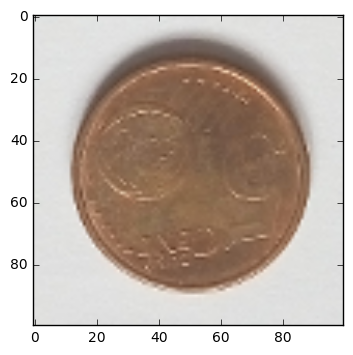

 0.02338072 of 1 cent 

 0.42029771 of 2 cent 

 0.00001815 of 5 cent 



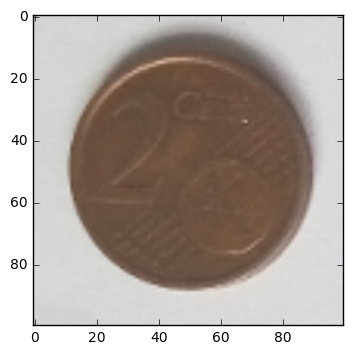

 0.91773176 of 10 cent 

 0.00006055 of 20 cent 

 0.00015097 of 50 cent 



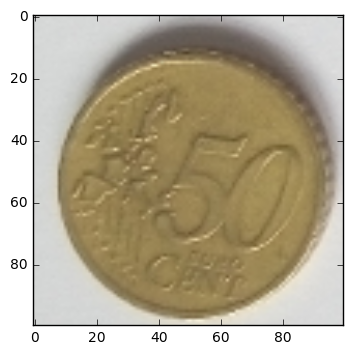

 0.00120295 of 1 cent 

 0.00053912 of 2 cent 

 0.00052731 of 5 cent 



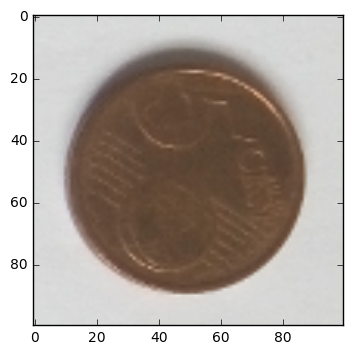

 0.00146337 of 10 cent 

 0.00004900 of 20 cent 

 0.46154866 of 50 cent 



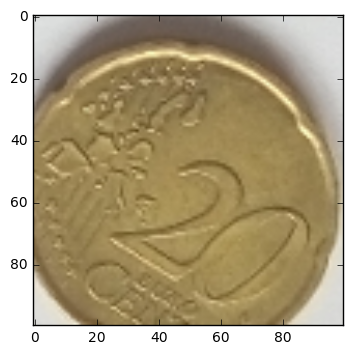

 0.92014897 of 1 euro 

 0.00000009 of 2 euro 



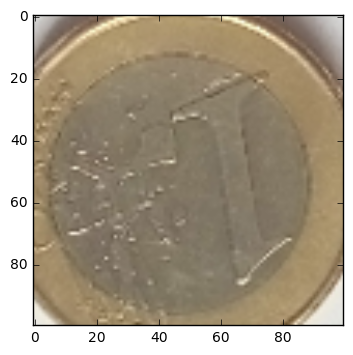

 0.97676325 of 10 cent 

 0.00005920 of 20 cent 

 0.00008805 of 50 cent 



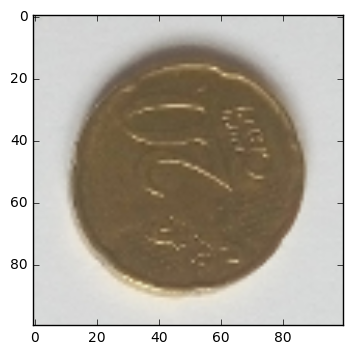

 0.97672439 of 10 cent 

 0.00005918 of 20 cent 

 0.00008794 of 50 cent 



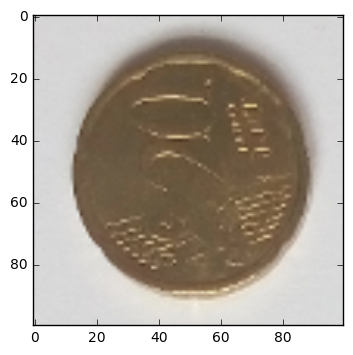

 0.03029370 of 1 cent 

 0.34808865 of 2 cent 

 0.00002108 of 5 cent 



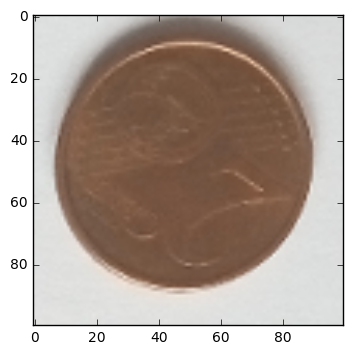

 0.10888052 of 1 cent 

 0.24788462 of 2 cent 

 0.00002834 of 5 cent 



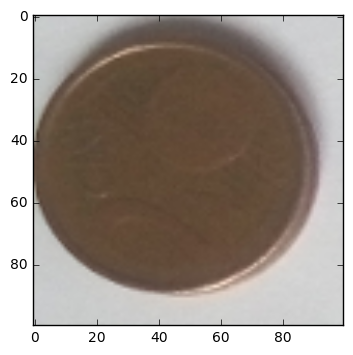

 0.92760456 of 1 cent 

 0.00004133 of 2 cent 

 0.75196207 of 5 cent 



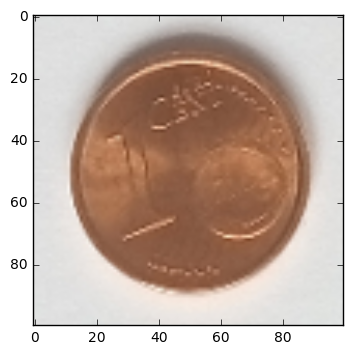

 0.97673219 of 10 cent 

 0.00005918 of 20 cent 

 0.00008796 of 50 cent 



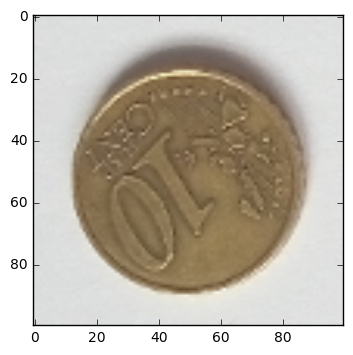

 0.96660155 of 1 cent 

 0.00010454 of 2 cent 

 0.00006480 of 5 cent 



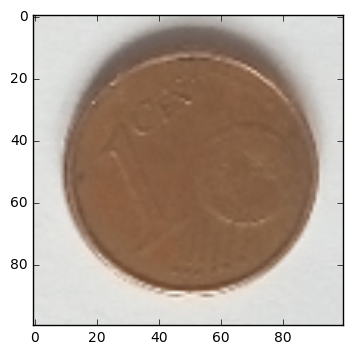

 Total money: 6.06 

Elapsed time: 9.739462 seconds.



In [2]:
#input_file = glob.glob(InputFolder+"*.jpg") #Try new Samples
input_file = [InputFolder+"P70216-160609.jpg"]  #For debugging
#input_file = [InputFolder+"P70210-173638.jpg"]  #For debugging

coinClassifier=LoadModel("Model_Example_Coin_Classifier")
coinClassifier.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])
coinClassifierBigCoins=LoadModel("Model_Example_Coin_Classifier_BigCoins")
coinClassifierBigCoins.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])
#coinClassifierGoldCoins=LoadModel("Model_Example_Coin_Classifier_GoldenCoins")
coinClassifierGoldCoins=LoadModel("Model_Example_Coin_Classifier_GoldenCoins_Reduced")
coinClassifierGoldCoins.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])
#coinClassifierSmallCoins=LoadModel("Model_Example_Coin_Classifier_SmallCoins")
coinClassifierSmallCoins=LoadModel("Model_Example_Coin_Classifier_SmallCoins_Reduced")
coinClassifierSmallCoins.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])

ROWS = 100
COLS = 100

for kfile in input_file:
    tic()
    print("Analyzing input image "+str(kfile))
    #Getting the Circles
    im = Image.open(kfile)
    imarray = np.array(im)
    imgResized = cv2.resize(imarray, (int(imarray.shape[1]/3),int(imarray.shape[0]/3)), interpolation=cv2.INTER_CUBIC)
     
    circles = findCircles(imgResized)
    showInformation(drawCircles(imgResized, circles))
    candidates = showCandidates(imgResized, circles)
    
    #Saving output
    #saveCandidates(CoinsOutputFolder, kfile, candidates)
    #testCandidates = prep_data(candidates)
    money = 0.0
    
    for index, i in enumerate(candidates):
        #print index, i.shape
        imgResizedTest = cv2.resize(i, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)
        imgResizedTest = [imgResizedTest for i in range(0,1)]
        imgResizedTest = np.array(imgResizedTest)
        predictedLabel = coinClassifier.predict(imgResizedTest)
        #print(" %.8f of big coin \n" % predictedLabel[0,0])
        #print(" %.8f of golden coin \n" % predictedLabel[0,1])
        #print(" %.8f of small coin \n" % predictedLabel[0,2])
        coinGroup = np.argmax(predictedLabel)
        
        if coinGroup == 0:
            predictedLabel = coinClassifierBigCoins.predict(imgResizedTest)
            print(" %.8f of 1 euro \n" % predictedLabel[0,0])
            print(" %.8f of 2 euro \n" % predictedLabel[0,1])
            coinType = np.argmax(predictedLabel)
            if coinType == 0:
                money += 1
            else:
                money += 2
        elif coinGroup == 1:
            predictedLabel = coinClassifierGoldCoins.predict(imgResizedTest)
            print(" %.8f of 10 cent \n" % predictedLabel[0,0])
            print(" %.8f of 20 cent \n" % predictedLabel[0,1])
            print(" %.8f of 50 cent \n" % predictedLabel[0,2])
            coinType = np.argmax(predictedLabel)
            if coinType == 0:
                money += 0.10
            elif coinType == 1:
                money += 0.20
            else:
                money += 0.50
        elif coinGroup == 2:
            predictedLabel = coinClassifierSmallCoins.predict(imgResizedTest)
            print(" %.8f of 1 cent \n" % predictedLabel[0,0])
            print(" %.8f of 2 cent \n" % predictedLabel[0,1])
            print(" %.8f of 5 cent \n" % predictedLabel[0,2])
            coinType = np.argmax(predictedLabel)
            if coinType == 0:
                money += 0.01
            elif coinType == 1:
                money += 0.02
            else:
                money += 0.05
        else:
            print("No coin detected")
        
        plt.imshow(Image.fromarray(imgResizedTest[0],'RGB'))
        plt.show()
    print(" Total money: %.2f \n" % money)
        
    #circles = findCircles(imgSubstracted)
    #showInformation(drawCircles(imgSubstracted, circles))
    #candidates = showCandidates(imgSubstracted, circles)
    
    
    #saveCircles(CirclesOutputFolder, kfile, drawCircles(imgResized, circles))
    toc()